In [12]:
# test
import pandas as pd
import os
import matplotlib as mpl
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print(mpl.__version__)
# seaborn 스타일 사용
plt.style.use('seaborn-notebook')

# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
mpl.rcParams['axes.unicode_minus'] = False

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

3.4.3


In [19]:
data = pd.read_csv('riceClassification.csv')

In [20]:
data = data.drop('id' , axis = 1)

In [21]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [22]:
X = data.iloc[:,:-1]

In [23]:
y = data.iloc[:,-1]

In [7]:
y

0        1
1        1
2        1
3        1
4        1
        ..
18180    0
18181    0
18182    0
18183    0
18184    0
Name: Class, Length: 18185, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 의사결정 나무

In [24]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [26]:
# 예측정확도
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9819


# 정규화

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
standard = StandardScaler()

In [39]:
standard.fit(X)

StandardScaler()

In [40]:
Xs = standard.transform(X)

In [41]:
Xs

array([[-1.70363043, -4.80374424,  0.41792669, ..., -2.66177825,
         0.83958835, -2.66379989],
       [-2.83847845, -6.22078914, -0.83561103, ..., -4.85731791,
         1.83721534, -2.6354184 ],
       [-2.71851854, -6.09140363, -0.77169963, ..., -4.79985991,
         2.3835873 , -2.60595002],
       ...,
       [-0.45768318,  0.25018706, -0.6857677 , ..., -0.31708508,
        -0.37389933,  0.75045135],
       [-0.73372729, -0.02285299, -0.82824173, ..., -0.27918653,
        -1.08116545,  0.7868348 ],
       [-0.61513056,  0.11322075, -0.81671191, ..., -0.44047571,
        -0.53075529,  0.84669604]])

In [52]:
X = pd.DataFrame(Xs, columns = X.columns)
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,-1.703630,-4.803744,0.417927,-6.393938,-1.696989,-1.830049,0.391654,-2.661778,0.839588,-2.663800
1,-2.838478,-6.220789,-0.835611,-6.209583,-2.803539,-3.398143,0.923070,-4.857318,1.837215,-2.635418
2,-2.718519,-6.091404,-0.771700,-6.024520,-2.725641,-3.213879,1.365122,-4.799860,2.383587,-2.605950
3,-2.701479,-6.031573,-0.783130,-5.781578,-2.708996,-3.188141,1.598635,-4.777995,2.409877,-2.565690
4,-2.278893,-5.377799,-0.341288,-5.433479,-2.279559,-2.580390,1.463045,-4.111042,2.477331,-2.504645
...,...,...,...,...,...,...,...,...,...,...
18180,-0.806657,-0.246943,-0.872502,0.778548,-0.810816,-0.788051,-1.130973,-0.632104,-0.661944,0.720875
18181,0.373857,1.447410,-0.165603,0.784700,0.386282,0.417903,0.295131,1.149128,-0.990018,0.730936
18182,-0.457683,0.250187,-0.685768,0.796550,-0.462606,-0.414880,-0.530388,-0.317085,-0.373899,0.750451
18183,-0.733727,-0.022853,-0.828242,0.818359,-0.690307,-0.708755,-1.190322,-0.279187,-1.081165,0.786835


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [76]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [77]:
# 예측정확도
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9860


# randomforest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [16]:
# 예측정확도
print('rf 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

rf 예측 정확도: 0.9882


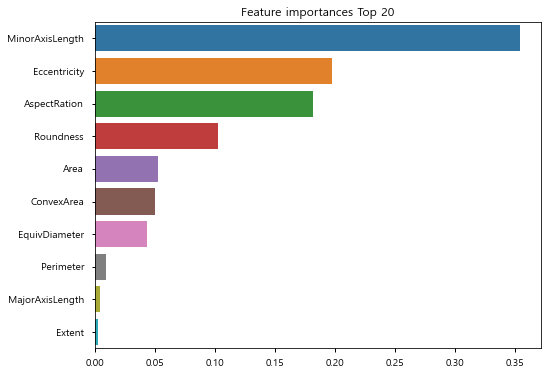

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index= X.columns )

# 중요도가 높은 10개의 피처들만 확인
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top10 , y = ftr_top10.index)
plt.show()

In [19]:
# 최적의 max_depth 찾기
print('max_depth | accuracy')
for i in range(2, 31):
    model = RandomForestClassifier(max_depth = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i, round(accuracy_score(y_test, pred), 4))

max_depth | accuracy
2 0.9868
3 0.9871
4 0.9876
5 0.9879
6 0.9879
7 0.9879
8 0.9882
9 0.9879
10 0.9885
11 0.9876
12 0.9879
13 0.9874
14 0.9893
15 0.9885
16 0.9876
17 0.9887
18 0.9885
19 0.9879
20 0.989
21 0.9882
22 0.9879
23 0.9885
24 0.9885
25 0.989
26 0.989
27 0.9885
28 0.9882
29 0.9882
30 0.9882


# GridSearch

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
%%time
params = {
    'max_depth' : [ 4, 6, 8 , 12, 16 , 20 ], 
    'min_samples_split' : [ 4, 6 , 8, 12, 16, 24 ],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )

grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_), '\n')
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV 최고 평균 정확도 수치: 0.9876 

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 4, 'min_samples_split': 16}
Wall time: 10.3 s


In [80]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=16)

In [81]:
best_df_clf = grid_cv.best_estimator_

pred = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.9885


In [85]:
%%time
params = {
    'max_depth' : [ 4, 6, 8 , 12, 16 , 20 ], 
    'min_samples_split' : [ 4, 6 , 8, 12, 16, 24 ],
}

grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )

grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_), '\n')
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV 최고 평균 정확도 수치: 0.9900 

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 12, 'min_samples_split': 6}
Wall time: 3min 31s


In [86]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=12, min_samples_split=6)

In [88]:
best_rf_clf = grid_cv.best_estimator_

pred = best_rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('rf 예측 정확도:{0:.4f}'.format(accuracy))

rf 예측 정확도:0.9893


# voting

In [10]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
LGBM = LGBMClassifier()
XGB = XGBClassifier()
RF = RandomForestClassifier()

# VotingClassifier 정의
VC = VotingClassifier(estimators=[('rf',RF),('xgb',XGB),('lgbm',LGBM)],voting = 'soft')

In [12]:
VC.fit(X_train,y_train)
pred = VC.predict(X_test)

[11:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
# 예측정확도
print('voting 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

voting 예측 정확도: 0.9879


# 딥러닝

In [61]:
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000
...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216


In [62]:
y

0        1
1        1
2        1
3        1
4        1
        ..
18180    0
18181    0
18182    0
18183    0
18184    0
Name: Class, Length: 18185, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [65]:
# X_train 피처는 'float32' 타입으로 만들어줘야 학습이 가능
X_train = np.asarray(X_train).astype('float32')
# X_test 피처도 'float32' 타입으로 만들어준다.
X_test = np.asarray(X_test).astype('float32')

In [66]:
Y_train = np.asarray(Y_train)

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
import tensorflow as tf

In [68]:
model = Sequential()
model.add(Dense(30,  input_dim=10, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [69]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15)

In [70]:
# 모델 학습
model.fit(X_train, Y_train, epochs=50, batch_size=5, validation_split=0.2, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.26839, saving model to ./model\01-0.2684.hdf5

Epoch 2: val_loss improved from 0.26839 to 0.22040, saving model to ./model\02-0.2204.hdf5

Epoch 3: val_loss improved from 0.22040 to 0.16463, saving model to ./model\03-0.1646.hdf5

Epoch 4: val_loss did not improve from 0.16463

Epoch 5: val_loss did not improve from 0.16463

Epoch 6: val_loss improved from 0.16463 to 0.07687, saving model to ./model\06-0.0769.hdf5

Epoch 7: val_loss did not improve from 0.07687

Epoch 8: val_loss did not improve from 0.07687

Epoch 9: val_loss did not improve from 0.07687

Epoch 10: val_loss did not improve from 0.07687

Epoch 11: val_loss improved from 0.07687 to 0.06314, saving model to ./model\11-0.0631.hdf5

Epoch 12: val_loss improved from 0.06314 to 0.05739, saving model to ./model\12-0.0574.hdf5

Epoch 13: val_loss did not improve from 0.05739

Epoch 14: val_loss improved from 0.05739 to 0.05735, saving model to ./model\14-0.0573.hdf5

Epoch 15: val_loss

In [71]:
Y_test = np.asarray(Y_test)

In [72]:
# 테스트셋에 모델 적용
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

171/171 [==============================] - 0s 560us/step - loss: 0.0666 - accuracy: 0.9767

 Test Accuracy: 0.9767
